# Compulsary Assignment 2

Nida Grønbekk

We are working on the wine data, which contains data on 799 different wines with 12 features about each wine, the first 11 features being continuous assets, while the last feature is categorical consisting of 1's and 0's. We start by loading the data.

Imports:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
wine_df = pd.read_csv('wine.csv')
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,class
0,10.4,0.520,0.45,2.0,0.080,6.0,13.0,0.99774,3.22,0.76,11.4,1
1,7.5,0.570,0.02,2.6,0.077,11.0,35.0,0.99557,3.36,0.62,10.8,1
2,6.6,0.695,0.00,2.1,0.075,12.0,56.0,0.99680,3.49,0.67,9.2,0
3,7.9,0.545,0.06,4.0,0.087,27.0,61.0,0.99650,3.36,0.67,10.7,1
4,8.0,0.180,0.37,0.9,0.049,36.0,109.0,0.99007,2.89,0.44,12.7,1


## 1. Visualization

We perform several plots of the data to look for possible outliers and pherhaps correlation between the variables.
We start with the violin plot.

<AxesSubplot:title={'center':'alcohol'}>

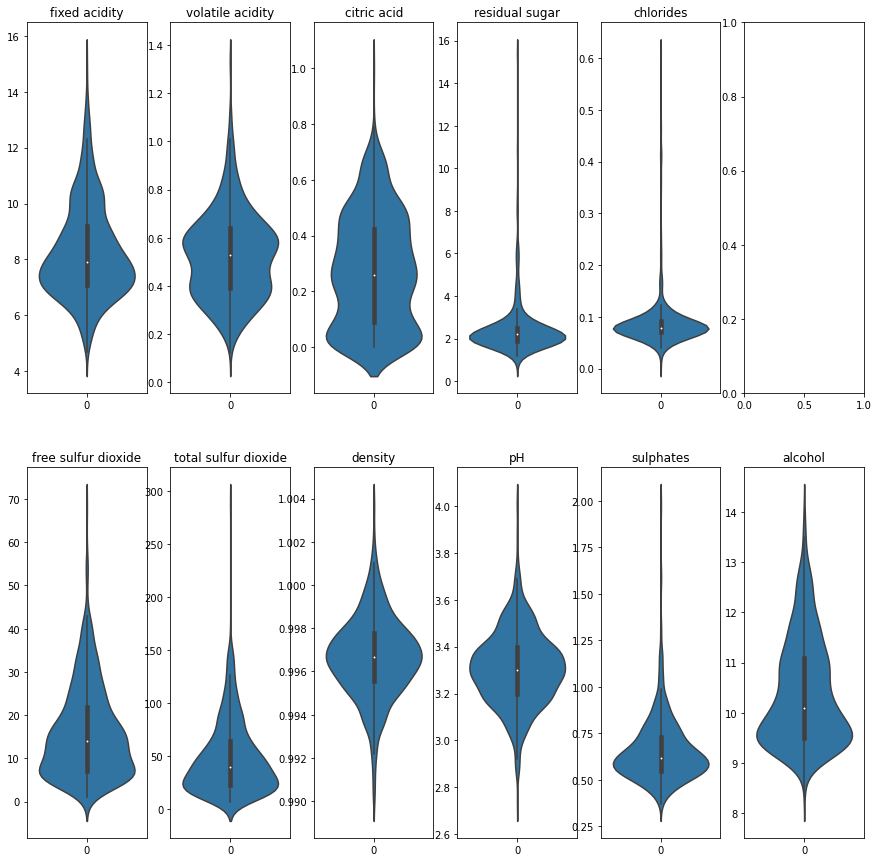

In [3]:
fig, axs = plt.subplots(2, 6, figsize=(15,15))
#2 rows 6 columns
axs[0,0].set_title('fixed acidity')
sns.violinplot(data=wine_df[wine_df.columns[0]],ax=axs[0,0])

axs[0,1].set_title('volatile acidity')
sns.violinplot(data=wine_df[wine_df.columns[1]],ax=axs[0,1])

axs[0,2].set_title('citric acid')
sns.violinplot(data=wine_df[wine_df.columns[2]],ax=axs[0,2])

axs[0,3].set_title('residual sugar')
sns.violinplot(data=wine_df[wine_df.columns[3]],ax=axs[0,3])

axs[0,4].set_title('chlorides')
sns.violinplot(data=wine_df[wine_df.columns[4]],ax=axs[0,4])

axs[1,0].set_title('free sulfur dioxide')
sns.violinplot(data=wine_df[wine_df.columns[5]],ax=axs[1,0])

axs[1,1].set_title('total sulfur dioxide')
sns.violinplot(data=wine_df[wine_df.columns[6]],ax=axs[1,1])

axs[1,2].set_title('density')
sns.violinplot(data=wine_df[wine_df.columns[7]],ax=axs[1,2])

axs[1,3].set_title('pH')
sns.violinplot(data=wine_df[wine_df.columns[8]],ax=axs[1,3])

axs[1,4].set_title('sulphates')
sns.violinplot(data=wine_df[wine_df.columns[9]],ax=axs[1,4])

axs[1,5].set_title('alcohol')
sns.violinplot(data=wine_df[wine_df.columns[10]],ax=axs[1,5])


We can see that all the features contains a few outliers to some degree, but the residual sugar, chlorides, total sulfur dioxide and sulphates contain outliers to a more extreme degree. We see this by the long lines at the top of the violin plot. For example residual sugar has most of the observations with values between 0 and 4 while a few have values 16, 4 times as large! The outliers may affect the models and make predictions worse.

We plot the scatter matrix to see if there is any relationship between the features.

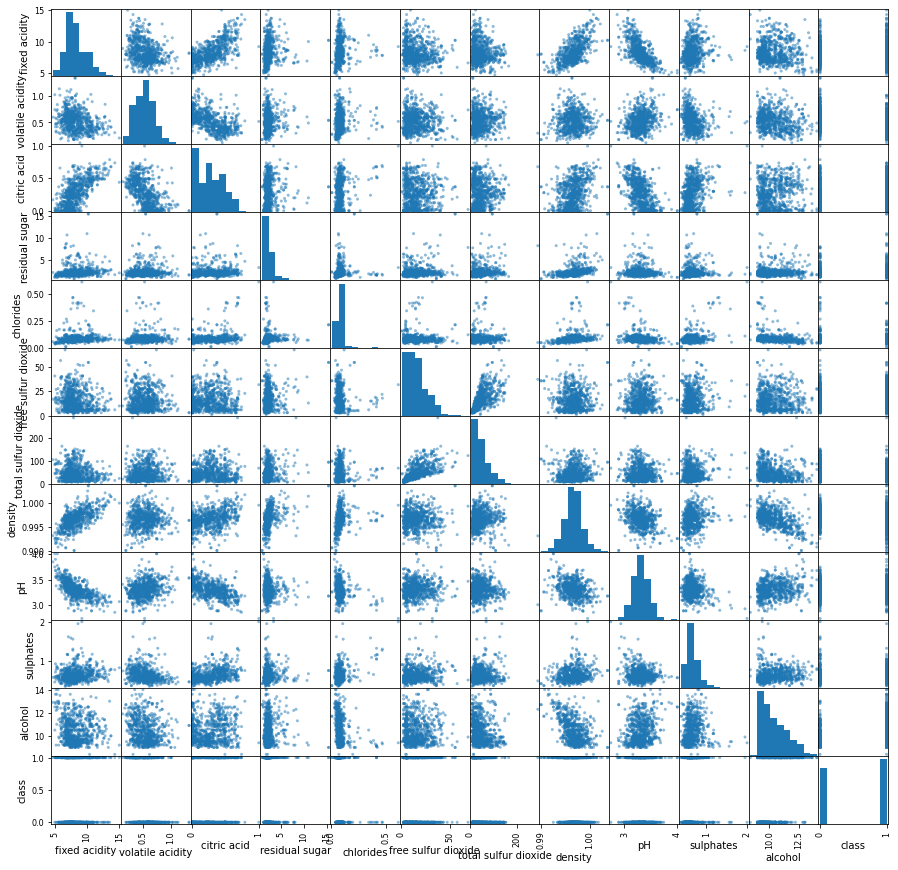

In [4]:
axes=pd.plotting.scatter_matrix(wine_df, figsize=(15,15))

In most of the plots we see groups of points, not really resembling a specific model. But in a few of them, like the pH vs. fixed acidity and the citric acid vs. fixed acidity we can see a hint of a logarithmic relationship. In the residual sugar vs. any other variable except y the points seem to follow a constant line, the same goes for chlorides vs. the other variables except y.

Lastly we plot the correlation matrix.

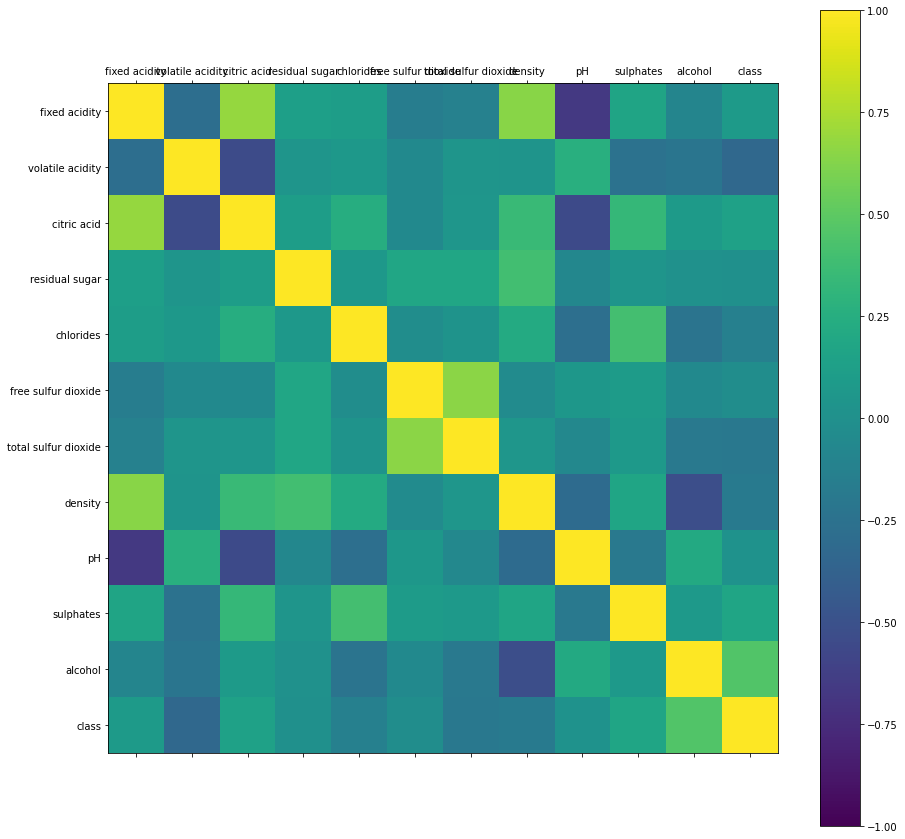

In [5]:
correlations = wine_df.corr()
# the code is retrieved from the lecture code
fig = plt.figure(figsize=(15,15))
# # add a subplot for the colorbar
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0, 12, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(list(wine_df.columns))
ax.set_yticklabels(list(wine_df.columns))
plt.show()

Most of the variables have a correlation of (+/-)0.25 or 0, however there are several varibles with correlations of (+/-) 0.75 (high correlation), those are citric acid vs. fixed acidity, density vs. fixed acidity, total sulfur dioxide vs. sulfur dioxide, density vs. alcohol, pH vs. fixed acidity. Overall there is not really a high correlation of all variables, but some of them do stand out as highly correlated. This tells us that is should be possible to fit a model predicting the class label as several features are correlated.

We also check for nan values.

In [6]:
wine_df.isnull().values.any() # check if there is any nan values

False

No nan values, do not need to worry about this.

## 2. The models and their accuracy

We split the data in a training (first 400 rows) and test set (remaining rows). As the Adaline and Perceptron models predict class labels -1 and 1, not 0 and 1, I choose to cast the values 0 in y to be -1, this way I can accurately find the accuracy.

In [15]:
X = wine_df[wine_df.columns[:-1]]
y_data = np.array(wine_df[wine_df.columns[11]]) 
y = np.where(y_data<1,-1,1)

#split in training and test data
X_train = X[:400]
X_test = X[400:]
y_train = y[:400]
y_test=y[400:]

We will now fit models using the Perceptron and the Adaline algorithms. Each of these will be fitted using 8 different types of subsets, and for each of these subsets we will run the algorithms with number of epochs between 1 and 50. We will also standardize each of the subsets. 

Before doing this we intialize a dataframe with nan values to later on store the accuracies of the models. We give the columns names '1 epochs',...,'50 epochs', and give the rows names after which subset we use.

In [16]:
#create dataframe to store accuracy with intitially nan values
index_names = ['first {} rows'.format(i) for i in [50,100,150,200,250,300,350,400]]
column_names = ['{} epochs'.format(i) for i in range(1,51)]
accuracy_perceptron_models=pd.DataFrame(columns=column_names,index=index_names,dtype=float)
accuracy_adaline_models=pd.DataFrame(columns=column_names,index=index_names,dtype=float)

We calculate accuracy by 

$accuracy = 1- error$ where error = number of misclassified samples/total number of samples.


We now make the subsets and train the models for both the AdalineGD and Perceptron class. Import the two classes from files named perceptron.py and adaline.py. The code in the two files are retrieved from the lecture material.

In [18]:
from perceptron import Perceptron
from adaline import AdalineGD

In [19]:
n = len(y_test)  #number of wines in test set

# The subsets are of the form: first 50 rows, first 100 rows,...,all 400 rows.
# Let the for-loop index i tell us which row to include in the subset.
for i in range(50,401,50):
    X_subset=X[:i]
    y_subset=y[:i]
    # scale the training and test data according to mean and std of training subset
    mean=np.mean(X_subset,axis=0)
    std=np.std(X_subset,axis=0,ddof=0)
    X_subset_std=np.asarray((X_subset-mean)/std)
    X_test_std = np.asarray((X_test-mean)/std) 
    for epochs in range(1,51):
        #Here we train the models
        #PERCEPTRON
        #create an instance of the Perceptron class with learning rate 0.0001 
        ppn = Perceptron(eta=0.0001,n_iter=epochs)
        # fit the model using the training data subset 
        ppn.fit(X_subset_std,y_subset)
        # predict the classes for y using the test data
        y_pred = ppn.predict(X_test_std)
        # find the accuracy
        accuracy = 1-(y_test!=y_pred).sum()/n
        # store the accuracy in the dataframe at the correct place.
        accuracy_perceptron_models.loc['first {} rows'.format(i),
                                       '{} epochs'.format(epochs)]=accuracy
        #ADALINE
        # Create an instance of the AdalineGD class with learning rate 0.0001
        adl = AdalineGD(eta=0.0001,n_iter=epochs)
        # fit the model using the training data subset
        adl.fit(X_subset_std,y_subset)
        #predict the classes of y using the test data
        y_pred = adl.predict(X_test_std)
        #calculate the accuracy
        accuracy = 1-(y_test!=y_pred).sum()/n
        # store the accuracy in the dataframe at the correct place.
        accuracy_adaline_models.loc['first {} rows'.format(i),
                                    '{} epochs'.format(epochs)]=accuracy

## 3. Heatmaps of accuracy

We plot the heatmaps of the accuracy of the two algorithms with all its models.

First for the Perceptron models:

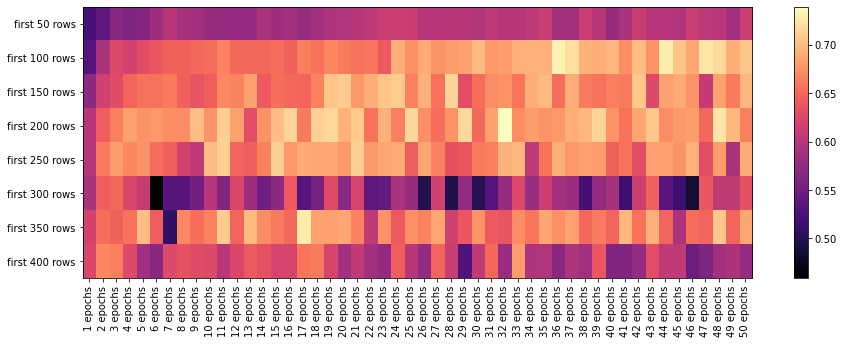

In [20]:
plt.figure(figsize=(15,5))
plt.imshow(accuracy_perceptron_models,aspect='auto',cmap='magma')
plt.colorbar()
plt.xticks(range(0,50),accuracy_perceptron_models.columns, rotation=90)
plt.yticks(range(len(accuracy_perceptron_models)),accuracy_perceptron_models.index)
plt.show()

Then for the Adaline models:

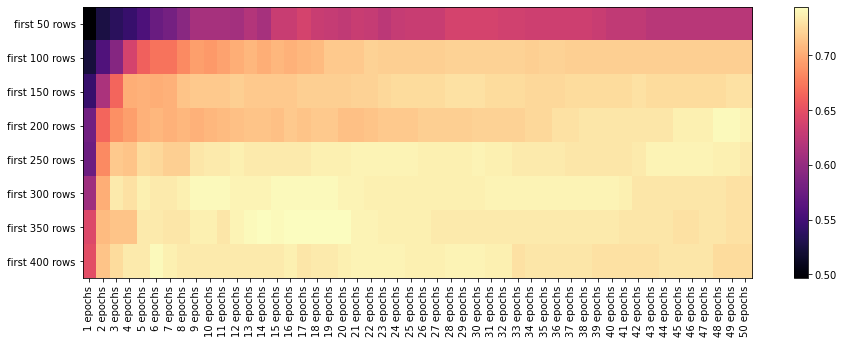

In [21]:
plt.figure(figsize=(15,5))
plt.imshow(accuracy_adaline_models,aspect='auto',cmap='magma')
plt.colorbar()
plt.xticks(range(0,50),accuracy_adaline_models.columns, rotation=90)
plt.yticks(range(len(accuracy_adaline_models)),accuracy_adaline_models.index)
plt.show()

## 4. Maximum test accuracy

We want to find the maximum test classification accuracy for both of the algorithms, and find which combination of subset and number of epochs gave the best results.

In [22]:
#perceptron
#df.max() gives maximum of each column, hence use df.max().max() to get overall maximum
best_ppn = accuracy_perceptron_models.max().max()
best_ppn

0.7393483709273183

In [23]:
#where is the max value
ppn_model_max = accuracy_perceptron_models.unstack().idxmax()
ppn_model_max

('32 epochs', 'first 200 rows')

In [24]:
best_adl = accuracy_adaline_models.max().max()
best_adl

0.7443609022556391

In [25]:
adl_model_max = accuracy_adaline_models.unstack().idxmax()
adl_model_max

('14 epochs', 'first 350 rows')

The Perceptron model has its maximum test accuracy vale 0.739, which occurs when we train the model on the first 200 rows of the training set and use 32 epochs. The Adaline model has maximum accuracy 0.744 when the model is trained on the first 350 rows using 14 epochs.

Check if there is any other combinations of subset and number of epochs that give the same accuracies.

In [26]:
list(accuracy_perceptron_models.unstack()).count(best_ppn)

1

We see that the best accuracy for the Perceptron model only occurs once, no other combination of subset and number of epchs give the same accuracy.

In [27]:
list(accuracy_adaline_models.unstack()).count(best_adl)

6

For the Adaline model however, we get the best accuracy for 6 different combinations of subset and number of epochs. Let us find where.

In [28]:
adl_series=accuracy_adaline_models.unstack()
adl_series[adl_series==best_adl]

14 epochs  first 350 rows    0.744361
16 epochs  first 350 rows    0.744361
17 epochs  first 350 rows    0.744361
18 epochs  first 350 rows    0.744361
19 epochs  first 350 rows    0.744361
20 epochs  first 350 rows    0.744361
dtype: float64

As we can see, we get the best accuracy for the Adaline model when training the model on the first 350 rows using 14, 16, 17, 18, 19 or 20 epochs.

## 5. Slower Perceptron

The fitting of the models using the Perceptron algorithm takes more time/is slower than the adaline algorithms. Why?

When examining the fit(X,y) function in both of the classes, we see that the Perceptron model uses a nested loop, first iterate through each of the epochs, then for each epoch, iterate through all the values of X and y. That is, in the inner loop we update the weights of the samples one by one. This has a runtime of O(n^2). In the Adaline class the fit(X,y) function only has one single loop, for each iteration calculate net input and cost functions and update weights. We update the weights of all of the samples at once. This has a runtime of O(n). Since we update all the weights of the samples at once, and not one by one like in the Perceptron model, this goes much faster.

## Improving the model by removing outliers

As we saw from the violin plots, there were several cases of extreme outliers. We try to remove some of them to see if we can improve the model prediction. 

I start by removing outliers based on the residual sugar variable. Want to remove the values outside the 10th and 90th percentile. When one value is to be removed, we remove the entire row in the dataset.

In [29]:
res = np.asarray(wine_df[wine_df.columns[3]])
qa1 = np.quantile(res,0.10) #10 th percentile
qa3 = np.quantile(res,0.90) #90 th percentile
indexes_to_remove=[]
for i in range(len(res)):
    if res[i]<qa1 or res[i]>qa3:
        indexes_to_remove.append(i)
        
new_df = wine_df.drop(indexes_to_remove)

I then dropped values based on outliers in the variable chlorides. Which we saw also had extreme cases of outliers in the violin plots.

In [30]:
cl = np.asarray(new_df[new_df.columns[4]])
cl_indexes=new_df[new_df.columns[4]].index
ql1 = np.quantile(cl,0.10) #10 th percentile
ql3 = np.quantile(cl,0.90) #90 th percentile
indexes_to_remove_cl=[]
for i in range(len(cl)):
    if cl[i]<ql1 or cl[i]>ql3:
        indexes_to_remove_cl.append(cl_indexes[i])
new2_df = new_df.drop(indexes_to_remove_cl)

And then lastly dropped rows based on the variable sulphates.

In [31]:
sul = np.asarray(new2_df[new2_df.columns[9]])
sul_indexes=new2_df[new2_df.columns[9]].index
s1 = np.quantile(sul,0.10) #10 th percentile
s3 = np.quantile(sul,0.90) #90 th percentile
indexes_to_remove_sul=[]
for i in range(len(sul)):
    if sul[i]<s1 or sul[i]>s3:
        indexes_to_remove_sul.append(sul_indexes[i])
wine_reduced_df = new2_df.drop(indexes_to_remove_sul)


Just to see how the outliers are removed I include a violinplot of the new dataset:

<AxesSubplot:title={'center':'alcohol'}>

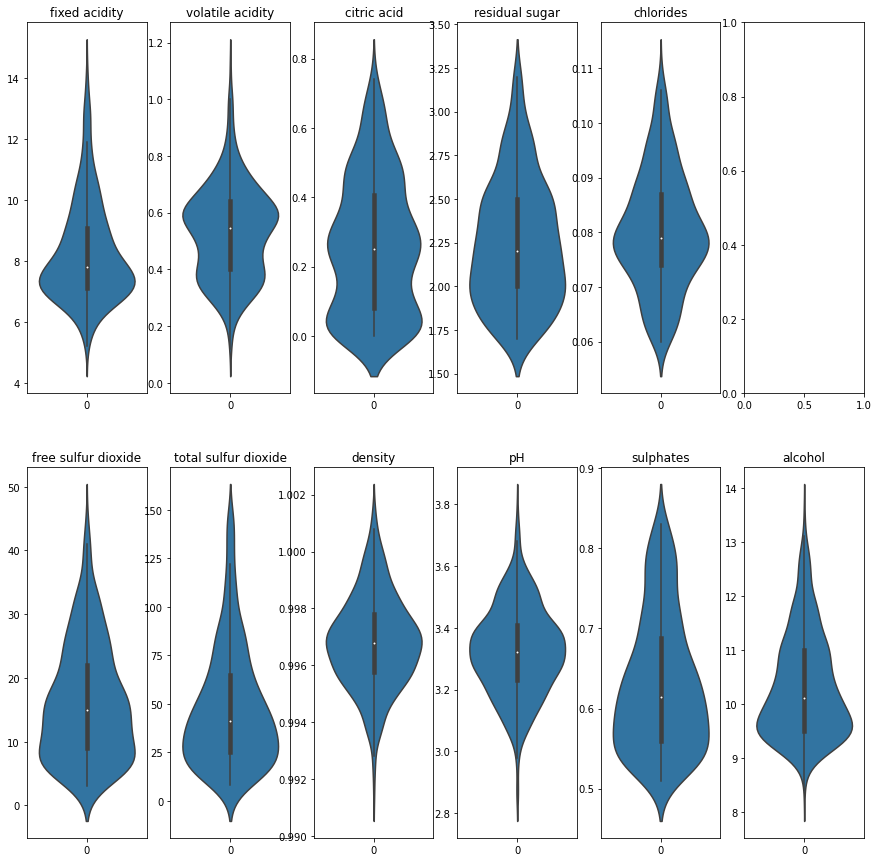

In [32]:
fig, axs = plt.subplots(2, 6, figsize=(15,15))
#2 rows 6 columns
axs[0,0].set_title('fixed acidity')
sns.violinplot(data=wine_reduced_df[wine_reduced_df.columns[0]],ax=axs[0,0])

axs[0,1].set_title('volatile acidity')
sns.violinplot(data=wine_reduced_df[wine_reduced_df.columns[1]],ax=axs[0,1])

axs[0,2].set_title('citric acid')
sns.violinplot(data=wine_reduced_df[wine_reduced_df.columns[2]],ax=axs[0,2])

axs[0,3].set_title('residual sugar')
sns.violinplot(data=wine_reduced_df[wine_reduced_df.columns[3]],ax=axs[0,3])

axs[0,4].set_title('chlorides')
sns.violinplot(data=wine_reduced_df[wine_reduced_df.columns[4]],ax=axs[0,4])

axs[1,0].set_title('free sulfur dioxide')
sns.violinplot(data=wine_reduced_df[wine_reduced_df.columns[5]],ax=axs[1,0])

axs[1,1].set_title('total sulfur dioxide')
sns.violinplot(data=wine_reduced_df[wine_reduced_df.columns[6]],ax=axs[1,1])

axs[1,2].set_title('density')
sns.violinplot(data=wine_reduced_df[wine_reduced_df.columns[7]],ax=axs[1,2])

axs[1,3].set_title('pH')
sns.violinplot(data=wine_reduced_df[wine_reduced_df.columns[8]],ax=axs[1,3])

axs[1,4].set_title('sulphates')
sns.violinplot(data=wine_reduced_df[wine_reduced_df.columns[9]],ax=axs[1,4])

axs[1,5].set_title('alcohol')
sns.violinplot(data=wine_reduced_df[wine_reduced_df.columns[10]],ax=axs[1,5])


The case of outliers are much better. We fit the new models with new subsets. The subsets will still follow the trend of first 50 rows,...,first 350 rows, all 400 rows. And use the number of epochs varying from 1 to 50.

In [33]:
# split in x and y
X = wine_reduced_df[wine_reduced_df.columns[:-1]]
y_data = np.array(wine_reduced_df[wine_reduced_df.columns[11]]) 
y = np.where(y_data<1,-1,1)

#split in training and test data
X_train = X[:400]
X_test = X[400:]
y_train = y[:400]
y_test=y[400:]

In [34]:
#create dataframe to store accuracy with intitially nan values
index_names = ['first {} rows'.format(i) for i in [50,100,150,200,250,300,350,400]]
column_names = ['{} epochs'.format(i) for i in range(1,51)]
accuracy_ppn_models=pd.DataFrame(columns=column_names,
                                                index=index_names, dtype=float)
accuracy_adl_models=pd.DataFrame(columns=column_names,
                                             index=index_names, dtype=float)

Fit the models and store the errors.

In [35]:
n = len(y_test)  #number of wines in test set

# The subsets are of the form: first 50 rows, first 100 rows,...,all 400 rows.
# Let the for-loop index i tell us which row to include in the subset.
for i in range(50,401,50):
    X_subset=X[:i]
    y_subset=y[:i]
    # scale the training and test data according to mean and std of training subset
    mean=np.mean(X_subset,axis=0)
    std=np.std(X_subset,axis=0,ddof=0)
    X_subset_std=np.asarray((X_subset-mean)/std)
    X_test_std = np.asarray((X_test-mean)/std) 
    for epochs in range(1,51):
        #Here we train the models
        #PERCEPTRON
        #create an instance of the Perceptron class with learning rate 0.0001 
        ppn = Perceptron(eta=0.0001,n_iter=epochs)
        # fit the model using the training data subset 
        ppn.fit(X_subset_std,y_subset)
        # predict the classes for y using the test data
        y_pred = ppn.predict(X_test_std)
        # find the accuracy
        accuracy = 1-(y_test!=y_pred).sum()/n
        # store the accuracy in the dataframe at the correct place.
        accuracy_ppn_models.loc['first {} rows'.format(i),
                                       '{} epochs'.format(epochs)]=accuracy
        #ADALINE
        # Create an instance of the AdalineGD class with learning rate 0.0001
        adl = AdalineGD(eta=0.0001,n_iter=epochs)
        # fit the model using the training data subset
        adl.fit(X_subset_std,y_subset)
        #predict the classes of y using the test data
        y_pred = adl.predict(X_test_std)
        #calculate the accuracy
        accuracy = 1-(y_test!=y_pred).sum()/n
        # store the accuracy in the dataframe at the correct place.
        accuracy_adl_models.loc['first {} rows'.format(i),
                                    '{} epochs'.format(epochs)]=accuracy

The best accuracy for the two models:

In [36]:
best_ppn = accuracy_ppn_models.max().max()  
best_adl = accuracy_adl_models.max().max()  
print('Best test accuracy perceptron: ',best_ppn,
      '\n best test accuracy adaline:',best_adl)

Best test accuracy perceptron:  0.9444444444444444 
 best test accuracy adaline: 0.9444444444444444


In [37]:
accuracy_adl_models.unstack().idxmax()

('37 epochs', 'first 400 rows')

In [38]:
accuracy_ppn_models.unstack().idxmax()

('21 epochs', 'first 400 rows')

These models had a much better accuracy than the ones using all of the dataset since we removed the outliers, which represents noise. The Adaline model had an accuracy of 0.944 when training the data on all first 400 rows and using 37 epochs, while the Perceptron model got the same accuracy when training the data on all 400 rows using 21 epochs.

However, we are traing models on a set of 400 rows, while the test set only contains 18 rows, we were lucky that these 18 rows was a realistic representation of the dataset. If we were unlucky it could happen that the 18 rows were rare cases not representative of the rest of the dataset, and then our model would perform badly (low accuracy).